In [3]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [34]:
import sys
import logging
import gym
import torch
torch.cuda.set_device('cuda:4')

import cyberbattle.agents.baseline.learner as learner_m
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity, AgentWrapper, ActionTrackingStateAugmentation

from matplotlib import pyplot as plt
logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [5]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v1"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [6]:
# Parameters
gymid = "CyberBattleToyCtf-v1"
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10


In [7]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

AttackerGoal(reward=0.0, low_availability=1.0, own_atleast=6, own_atleast_percent=0.0)


In [8]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 1500|reward:  198.0|last_reward_at:  162|Elapsed Time: 0:00:05||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/116 (0.01)
    explore-remote: 8/1147 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/226 (0.01)
  exploit deflected to exploration: 2
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:04||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/147 (0.01)
    explore-remote: 8/956 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/386 (0.01)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:04||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/107 (0.01)
    explore-remote: 8/881 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/501 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 1500|reward:  198.0|last_reward_at:  191|Elapsed Time: 0:00:04||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/92 (0.01)
    explore-remote: 8/781 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/616 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 1500|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/79 (0.01)
    explore-remote: 8/750 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/660 (0.00)
  exploit deflected to exploration: 75
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 1500|reward:  198.0|last_reward_at:  644|Elapsed Time: 0:00:04||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/94 (0.01)
    explore-remote: 8/678 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/717 (0.00)
  exploit deflected to exploration: 94
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  152|Elapsed Time: 0:00:04||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/81 (0.01)
    explore-remote: 8/607 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/801 (0.00)
  exploit deflected to exploration: 85
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 1500|reward:  198.0|last_reward_at:  259|Elapsed Time: 0:00:04||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/56 (0.02)
    explore-remote: 8/472 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/961 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 1500|reward:  198.0|last_reward_at:  782|Elapsed Time: 0:00:04||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/72 (0.01)
    explore-remote: 8/461 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/956 (0.00)
  exploit deflected to exploration: 60
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 1500|reward:  198.0|last_reward_at:  844|Elapsed Time: 0:00:04||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/57 (0.02)
    explore-remote: 8/447 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/985 (0.00)
  exploit deflected to exploration: 49
simulation ended


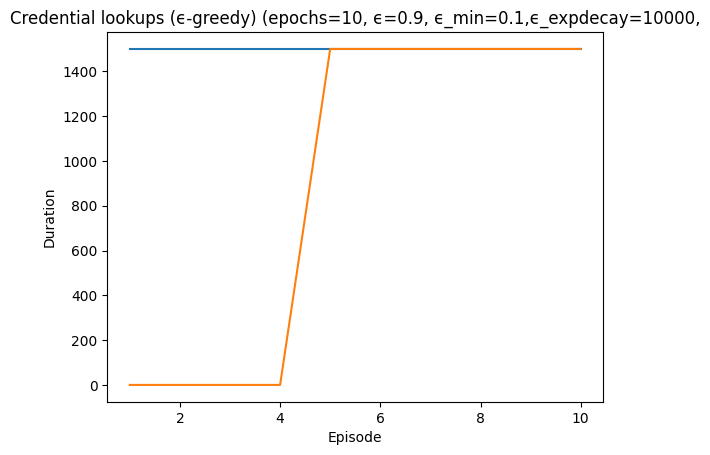

In [9]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [10]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 1500|reward:  312.0|last_reward_at:  818|Elapsed Time: 0:00:07||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/82 (0.02)
    explore-remote: 8/584 (0.01)
    explore-connect: 1/511 (0.00)
    exploit-local: 0/1 (0.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 2/308 (0.01)
  exploit deflected to exploration: 18
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 1404|reward:  426.0|last_reward_at: 1404|Elapsed Time: 0:00:06||


  Episode 2 ended at t=1407 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/70 (0.04)
    explore-remote: 8/400 (0.02)
    explore-connect: 2/383 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/18 (0.00)
    exploit-connect: 2/521 (0.00)
  exploit deflected to exploration: 54
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.5077, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 1500|reward:  312.0|last_reward_at:  872|Elapsed Time: 0:00:06||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/52 (0.04)
    explore-remote: 5/298 (0.02)
    explore-connect: 1/291 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 2/845 (0.00)
  exploit deflected to exploration: 23
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3787, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 1500|reward:  412.0|last_reward_at: 1436|Elapsed Time: 0:00:07||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/31 (0.03)
    explore-remote: 5/246 (0.02)
    explore-connect: 2/224 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/46 (0.06)
    exploit-connect: 2/939 (0.00)
  exploit deflected to exploration: 42
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2832, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 1500|reward:  192.0|last_reward_at:  438|Elapsed Time: 0:00:06||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/29 (0.00)
    explore-remote: 3/196 (0.02)
    explore-connect: 0/196 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/9 (0.31)
    exploit-connect: 2/1060 (0.00)
  exploit deflected to exploration: 24
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2124, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 1500|reward:  117.0|last_reward_at:   43|Elapsed Time: 0:00:05||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/20 (0.00)
    explore-remote: 1/149 (0.01)
    explore-connect: 0/130 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/16 (0.20)
    exploit-connect: 1/1178 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1599, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 1318|reward:  420.0|last_reward_at: 1318|Elapsed Time: 0:00:05||


  Episode 7 ended at t=1319 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 3/100 (0.03)
    explore-connect: 2/103 (0.02)
    exploit-local: 2/0 (1.00)
    exploit-remote: 4/59 (0.06)
    exploit-connect: 2/1026 (0.00)
  exploit deflected to exploration: 54
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1251, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 1500|reward:  128.0|last_reward_at:  789|Elapsed Time: 0:00:05||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 3/76 (0.04)
    explore-connect: 0/86 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/7 (0.30)
    exploit-connect: 1/1307 (0.00)
  exploit deflected to exploration: 24
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0953, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 1500|reward:  198.0|last_reward_at: 1097|Elapsed Time: 0:00:05||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 4/59 (0.06)
    explore-connect: 0/61 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/0 (1.00)
    exploit-connect: 2/1362 (0.00)
  exploit deflected to exploration: 16
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0732, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 1500|reward:  306.0|last_reward_at: 1188|Elapsed Time: 0:00:06||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 4/77 (0.05)
    explore-connect: 1/82 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 2/1308 (0.00)
  exploit deflected to exploration: 77
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0568, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 1500|reward:  181.0|last_reward_at:  231|Elapsed Time: 0:00:05||


  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/50 (0.04)
    explore-connect: 0/47 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 2/1388 (0.00)
  exploit deflected to exploration: 36
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0447, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 1500|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:05||


  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 2/52 (0.04)
    explore-connect: 0/50 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/1 (0.80)
    exploit-connect: 1/1380 (0.00)
  exploit deflected to exploration: 64
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0357, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 1500|reward:  181.0|last_reward_at:   34|Elapsed Time: 0:00:06||


  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/4 (0.50)
    exploit-connect: 2/1420 (0.00)
  exploit deflected to exploration: 20
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0290, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 1500|reward:  117.0|last_reward_at:   36|Elapsed Time: 0:00:05||


  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/31 (0.03)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 1/1423 (0.00)
  exploit deflected to exploration: 22
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0241, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 1500|reward:  117.0|last_reward_at:   91|Elapsed Time: 0:00:05||


  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 0/38 (0.00)
    explore-connect: 0/46 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/18 (0.22)
    exploit-connect: 1/1385 (0.00)
  exploit deflected to exploration: 64
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0204, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 1500|reward:  128.0|last_reward_at:   88|Elapsed Time: 0:00:05||


  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/51 (0.04)
    explore-connect: 0/50 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 1/1382 (0.00)
  exploit deflected to exploration: 72
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0177, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 1500|reward:  231.0|last_reward_at:  360|Elapsed Time: 0:00:05||


  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/31 (0.03)
    explore-connect: 1/24 (0.04)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/3 (0.57)
    exploit-connect: 1/1430 (0.00)
  exploit deflected to exploration: 39
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0157, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 1500|reward:  181.0|last_reward_at: 1229|Elapsed Time: 0:00:05||


  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 2/43 (0.04)
    explore-connect: 0/34 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 2/1399 (0.00)
  exploit deflected to exploration: 60
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0142, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 1500|reward:  198.0|last_reward_at: 1182|Elapsed Time: 0:00:08||


  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/35 (0.00)
    explore-remote: 2/308 (0.01)
    explore-connect: 0/284 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/548 (0.01)
    exploit-connect: 2/314 (0.01)
  exploit deflected to exploration: 609
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0131, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 1500|reward:  189.0|last_reward_at: 1327|Elapsed Time: 0:00:07||


  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/26 (0.00)
    explore-remote: 3/162 (0.02)
    explore-connect: 0/169 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/1133 (0.00)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 344
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 1500|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:06||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/1493 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 1500|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:05||


  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/14 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/34 (0.11)
    exploit-connect: 1/1437 (0.00)
  exploit deflected to exploration: 24
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 1500|reward:  183.0|last_reward_at:   68|Elapsed Time: 0:00:07||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/10 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/1469 (0.00)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 24
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 1500|reward:  117.0|last_reward_at:   33|Elapsed Time: 0:00:05||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/3 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/14 (0.22)
    exploit-connect: 1/1467 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 1500|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:06||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/1494 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 1500|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:00:05||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1495 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 1500|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:05||


  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/7 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/39 (0.09)
    exploit-connect: 1/1439 (0.00)
  exploit deflected to exploration: 17
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 1500|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:06||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/8 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 6/42 (0.12)
    exploit-connect: 2/1428 (0.00)
  exploit deflected to exploration: 22
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 1500|reward:  117.0|last_reward_at:   27|Elapsed Time: 0:00:05||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/20 (0.17)
    exploit-connect: 1/1473 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 1500|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:06||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/1494 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 2
simulation ended


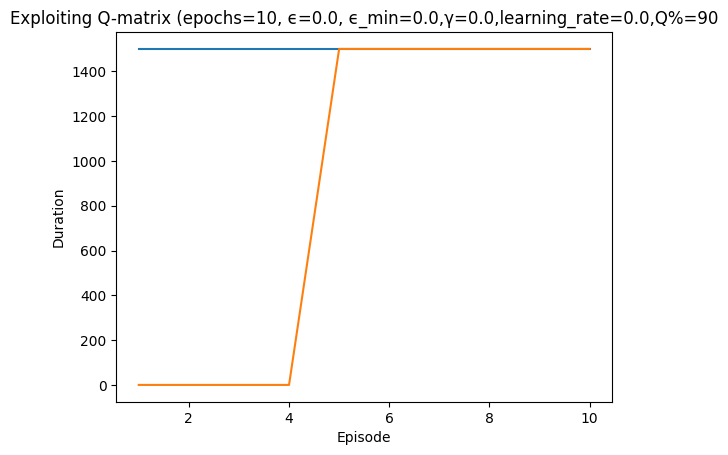

In [11]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [ ]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

In [37]:
# Evaluate the Deep Q-learning agent
dql_run_200 = learner_m.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=200,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=200,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/200 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 1500|reward:  312.0|last_reward_at: 1023|Elapsed Time: 0:00:15||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/117 (0.02)
    explore-remote: 7/548 (0.01)
    explore-connect: 3/534 (0.01)
    exploit-local: 0/2 (0.00)
    exploit-remote: 1/144 (0.01)
    exploit-connect: 0/142 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 2/200 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 1500|reward:  312.0|last_reward_at:  273|Elapsed Time: 0:00:22||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/67 (0.01)
    explore-remote: 7/449 (0.02)
    explore-connect: 0/401 (0.00)
    exploit-local: 1/64 (0.02)
    exploit-remote: 1/401 (0.00)
    exploit-connect: 3/105 (0.03)
  exploit deflected to exploration: 7
  ## Episode: 3/200 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 475|reward:  420.0|last_reward_at:  451|Elapsed Time: 0:00:07||


  Episode 3 ended at t=476 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/35 (0.08)
    explore-remote: 4/109 (0.04)
    explore-connect: 1/85 (0.01)
    exploit-local: 0/43 (0.00)
    exploit-remote: 3/139 (0.02)
    exploit-connect: 3/51 (0.06)
  exploit deflected to exploration: 7
  ## Episode: 4/200 'DQL' ϵ=0.4993, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 922|reward:  426.0|last_reward_at:  909|Elapsed Time: 0:00:14||


  Episode 4 ended at t=922 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/44 (0.04)
    explore-remote: 5/222 (0.02)
    explore-connect: 0/180 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 3/335 (0.01)
    exploit-connect: 4/105 (0.04)
  exploit deflected to exploration: 36
  ## Episode: 5/200 'DQL' ϵ=0.4320, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 221|reward:  409.0|last_reward_at:  157|Elapsed Time: 0:00:03||


  Episode 5 ended at t=221 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 3/45 (0.06)
    explore-connect: 0/46 (0.00)
    exploit-local: 0/9 (0.00)
    exploit-remote: 3/77 (0.04)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 9
  ## Episode: 6/200 'DQL' ϵ=0.4177, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 257|reward:  415.0|last_reward_at:  239|Elapsed Time: 0:00:03||


  Episode 6 ended at t=257 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 4/65 (0.06)
    explore-connect: 1/49 (0.02)
    exploit-local: 2/8 (0.20)
    exploit-remote: 3/86 (0.03)
    exploit-connect: 3/25 (0.11)
  exploit deflected to exploration: 15
  ## Episode: 7/200 'DQL' ϵ=0.4018, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 176|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:03||


  Episode 7 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/38 (0.05)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/56 (0.08)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 26
  ## Episode: 8/200 'DQL' ϵ=0.3911, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 313|reward:  426.0|last_reward_at:  295|Elapsed Time: 0:00:05||


  Episode 8 ended at t=317 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 2/79 (0.02)
    explore-connect: 0/62 (0.00)
    exploit-local: 1/8 (0.11)
    exploit-remote: 6/116 (0.05)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 37
  ## Episode: 9/200 'DQL' ϵ=0.3732, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 577|reward:  409.0|last_reward_at:  577|Elapsed Time: 0:00:11||


  Episode 9 ended at t=580 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 1/119 (0.01)
    explore-connect: 0/111 (0.00)
    exploit-local: 2/48 (0.04)
    exploit-remote: 5/225 (0.02)
    exploit-connect: 4/43 (0.09)
  exploit deflected to exploration: 54
  ## Episode: 10/200 'DQL' ϵ=0.3433, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 380|reward:  415.0|last_reward_at:  380|Elapsed Time: 0:00:06||


  Episode 10 ended at t=383 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 4/76 (0.05)
    explore-connect: 0/68 (0.00)
    exploit-local: 1/19 (0.05)
    exploit-remote: 3/179 (0.02)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 41
  ## Episode: 11/200 'DQL' ϵ=0.3253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 447|reward:  426.0|last_reward_at:  400|Elapsed Time: 0:00:07||


  Episode 11 ended at t=449 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/15 (0.17)
    explore-remote: 4/86 (0.04)
    explore-connect: 0/76 (0.00)
    exploit-local: 0/32 (0.00)
    exploit-remote: 4/185 (0.02)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 43
  ## Episode: 12/200 'DQL' ϵ=0.3060, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 394|reward:  426.0|last_reward_at:  382|Elapsed Time: 0:00:07||


  Episode 12 ended at t=395 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/17 (0.15)
    explore-remote: 3/75 (0.04)
    explore-connect: 0/79 (0.00)
    exploit-local: 0/31 (0.00)
    exploit-remote: 5/151 (0.03)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 42
  ## Episode: 13/200 'DQL' ϵ=0.2903, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 300|reward:  420.0|last_reward_at:  282|Elapsed Time: 0:00:05||


  Episode 13 ended at t=301 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/11 (0.21)
    explore-remote: 2/58 (0.03)
    explore-connect: 0/53 (0.00)
    exploit-local: 0/22 (0.00)
    exploit-remote: 5/108 (0.04)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 23
  ## Episode: 14/200 'DQL' ϵ=0.2792, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 537|reward:  415.0|last_reward_at:  515|Elapsed Time: 0:00:11||


  Episode 14 ended at t=538 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 1/100 (0.01)
    explore-connect: 0/105 (0.00)
    exploit-local: 2/45 (0.04)
    exploit-remote: 6/219 (0.03)
    exploit-connect: 4/36 (0.10)
  exploit deflected to exploration: 75
  ## Episode: 15/200 'DQL' ϵ=0.2609, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 238|reward:  409.0|last_reward_at:  217|Elapsed Time: 0:00:04||


  Episode 15 ended at t=241 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/41 (0.07)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/22 (0.04)
    exploit-remote: 3/111 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 33
  ## Episode: 16/200 'DQL' ϵ=0.2534, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 404|reward:  426.0|last_reward_at:  390|Elapsed Time: 0:00:07||


  Episode 16 ended at t=409 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 4/80 (0.05)
    explore-connect: 0/69 (0.00)
    exploit-local: 1/35 (0.03)
    exploit-remote: 4/159 (0.02)
    exploit-connect: 4/39 (0.09)
  exploit deflected to exploration: 54
  ## Episode: 17/200 'DQL' ϵ=0.2413, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 228|reward:  415.0|last_reward_at:  222|Elapsed Time: 0:00:04||


  Episode 17 ended at t=229 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/37 (0.03)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 6/101 (0.06)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 24
  ## Episode: 18/200 'DQL' ϵ=0.2350, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 374|reward:  415.0|last_reward_at:  341|Elapsed Time: 0:00:07||


  Episode 18 ended at t=376 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 0/57 (0.00)
    explore-connect: 0/67 (0.00)
    exploit-local: 1/26 (0.04)
    exploit-remote: 7/195 (0.03)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 49
  ## Episode: 19/200 'DQL' ϵ=0.2252, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 449|reward:  426.0|last_reward_at:  433|Elapsed Time: 0:00:07||


  Episode 19 ended at t=453 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 1/63 (0.02)
    explore-connect: 0/47 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 7/237 (0.03)
    exploit-connect: 4/49 (0.08)
  exploit deflected to exploration: 20
  ## Episode: 20/200 'DQL' ϵ=0.2144, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 512|reward:  415.0|last_reward_at:  485|Elapsed Time: 0:00:09||


  Episode 20 ended at t=516 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 2/66 (0.03)
    explore-connect: 0/63 (0.00)
    exploit-local: 1/36 (0.03)
    exploit-remote: 5/257 (0.02)
    exploit-connect: 4/68 (0.06)
  exploit deflected to exploration: 40
  ## Episode: 21/200 'DQL' ϵ=0.2032, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 352|reward:  426.0|last_reward_at:  352|Elapsed Time: 0:00:07||


  Episode 21 ended at t=353 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/46 (0.06)
    explore-connect: 0/57 (0.00)
    exploit-local: 2/37 (0.05)
    exploit-remote: 5/183 (0.03)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 47
  ## Episode: 22/200 'DQL' ϵ=0.1961, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 436|reward:  426.0|last_reward_at:  436|Elapsed Time: 0:00:08||


  Episode 22 ended at t=442 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 1/48 (0.02)
    explore-connect: 1/47 (0.02)
    exploit-local: 0/29 (0.00)
    exploit-remote: 7/258 (0.03)
    exploit-connect: 3/42 (0.07)
  exploit deflected to exploration: 24
  ## Episode: 23/200 'DQL' ϵ=0.1880, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 621|reward:  426.0|last_reward_at:  621|Elapsed Time: 0:00:11||


  Episode 23 ended at t=622 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 2/75 (0.03)
    explore-connect: 1/82 (0.01)
    exploit-local: 0/42 (0.00)
    exploit-remote: 6/344 (0.02)
    exploit-connect: 3/51 (0.06)
  exploit deflected to exploration: 54
  ## Episode: 24/200 'DQL' ϵ=0.1777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 516|reward:  415.0|last_reward_at:  494|Elapsed Time: 0:00:10||


  Episode 24 ended at t=521 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 1/62 (0.02)
    explore-connect: 0/61 (0.00)
    exploit-local: 0/47 (0.00)
    exploit-remote: 6/321 (0.02)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 56
  ## Episode: 25/200 'DQL' ϵ=0.1700, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 261|reward:  415.0|last_reward_at:  237|Elapsed Time: 0:00:04||


  Episode 25 ended at t=261 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/36 (0.05)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 5/156 (0.03)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 28
  ## Episode: 26/200 'DQL' ϵ=0.1664, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 193|reward:  415.0|last_reward_at:  193|Elapsed Time: 0:00:03||


  Episode 26 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/7 (0.22)
    exploit-remote: 6/123 (0.05)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 20
  ## Episode: 27/200 'DQL' ϵ=0.1639, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 317|reward:  426.0|last_reward_at:  288|Elapsed Time: 0:00:05||


  Episode 27 ended at t=322 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/42 (0.07)
    explore-connect: 0/45 (0.00)
    exploit-local: 1/15 (0.06)
    exploit-remote: 5/181 (0.03)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 46
  ## Episode: 28/200 'DQL' ϵ=0.1599, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 262|reward:  426.0|last_reward_at:  262|Elapsed Time: 0:00:04||


  Episode 28 ended at t=263 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/30 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 8/160 (0.05)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 20
  ## Episode: 29/200 'DQL' ϵ=0.1568, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 142|reward:  409.0|last_reward_at:  131|Elapsed Time: 0:00:02||


  Episode 29 ended at t=144 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/17 (0.15)
    explore-connect: 0/10 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 3/75 (0.04)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 5
  ## Episode: 30/200 'DQL' ϵ=0.1552, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 187|reward:  415.0|last_reward_at:  181|Elapsed Time: 0:00:04||


  Episode 30 ended at t=190 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/24 (0.11)
    explore-connect: 1/19 (0.05)
    exploit-local: 1/26 (0.04)
    exploit-remote: 4/94 (0.04)
    exploit-connect: 3/5 (0.38)
  exploit deflected to exploration: 27
  ## Episode: 31/200 'DQL' ϵ=0.1532, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 386|reward:  426.0|last_reward_at:  367|Elapsed Time: 0:00:06||


  Episode 31 ended at t=387 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 2/38 (0.05)
    explore-connect: 0/45 (0.00)
    exploit-local: 2/14 (0.12)
    exploit-remote: 6/222 (0.03)
    exploit-connect: 4/46 (0.08)
  exploit deflected to exploration: 34
  ## Episode: 32/200 'DQL' ϵ=0.1492, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 168|reward:  409.0|last_reward_at:  147|Elapsed Time: 0:00:02||


  Episode 32 ended at t=171 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 0/19 (0.00)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 6/94 (0.06)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 10
  ## Episode: 33/200 'DQL' ϵ=0.1476, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 357|reward:  415.0|last_reward_at:  352|Elapsed Time: 0:00:06||


  Episode 33 ended at t=363 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 1/41 (0.02)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/33 (0.03)
    exploit-remote: 6/176 (0.03)
    exploit-connect: 4/49 (0.08)
  exploit deflected to exploration: 32
  ## Episode: 34/200 'DQL' ϵ=0.1442, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 190|reward:  409.0|last_reward_at:  190|Elapsed Time: 0:00:02||


  Episode 34 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/15 (0.00)
    exploit-local: 3/15 (0.17)
    exploit-remote: 5/95 (0.05)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 25
  ## Episode: 35/200 'DQL' ϵ=0.1425, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 453|reward:  426.0|last_reward_at:  446|Elapsed Time: 0:00:09||


  Episode 35 ended at t=453 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/24 (0.08)
    explore-remote: 2/64 (0.03)
    explore-connect: 1/61 (0.02)
    exploit-local: 1/27 (0.04)
    exploit-remote: 6/210 (0.03)
    exploit-connect: 3/52 (0.05)
  exploit deflected to exploration: 89
  ## Episode: 36/200 'DQL' ϵ=0.1388, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 289|reward:  420.0|last_reward_at:  277|Elapsed Time: 0:00:05||


  Episode 36 ended at t=291 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 3/32 (0.09)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 4/148 (0.03)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 32
  ## Episode: 37/200 'DQL' ϵ=0.1366, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 289|reward:  415.0|last_reward_at:  226|Elapsed Time: 0:00:05||


  Episode 37 ended at t=290 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 2/37 (0.05)
    explore-connect: 0/28 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 5/127 (0.04)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 34
  ## Episode: 38/200 'DQL' ϵ=0.1346, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 367|reward:  415.0|last_reward_at:  356|Elapsed Time: 0:00:06||


  Episode 38 ended at t=369 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 1/36 (0.03)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 6/206 (0.03)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 37
  ## Episode: 39/200 'DQL' ϵ=0.1321, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 183|reward:  415.0|last_reward_at:  164|Elapsed Time: 0:00:03||


  Episode 39 ended at t=183 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/25 (0.07)
    explore-connect: 0/9 (0.00)
    exploit-local: 1/19 (0.05)
    exploit-remote: 5/105 (0.05)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 18
  ## Episode: 40/200 'DQL' ϵ=0.1310, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 265|reward:  420.0|last_reward_at:  260|Elapsed Time: 0:00:04||


  Episode 40 ended at t=265 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/46 (0.02)
    explore-connect: 1/15 (0.06)
    exploit-local: 2/14 (0.12)
    exploit-remote: 6/137 (0.04)
    exploit-connect: 3/30 (0.09)
  exploit deflected to exploration: 34
  ## Episode: 41/200 'DQL' ϵ=0.1294, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 366|reward:  426.0|last_reward_at:  359|Elapsed Time: 0:00:06||


  Episode 41 ended at t=367 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 3/57 (0.05)
    explore-connect: 0/43 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 5/201 (0.02)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 67
  ## Episode: 42/200 'DQL' ϵ=0.1273, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 239|reward:  426.0|last_reward_at:  225|Elapsed Time: 0:00:04||


  Episode 42 ended at t=243 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/30 (0.00)
    exploit-local: 0/15 (0.00)
    exploit-remote: 6/123 (0.05)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 31
  ## Episode: 43/200 'DQL' ϵ=0.1260, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 301|reward:  426.0|last_reward_at:  301|Elapsed Time: 0:00:05||


  Episode 43 ended at t=305 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/32 (0.03)
    explore-connect: 0/33 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 7/164 (0.04)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 46
  ## Episode: 44/200 'DQL' ϵ=0.1245, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 292|reward:  415.0|last_reward_at:  277|Elapsed Time: 0:00:06||


  Episode 44 ended at t=293 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/37 (0.00)
    exploit-local: 2/44 (0.04)
    exploit-remote: 6/151 (0.04)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 38
  ## Episode: 45/200 'DQL' ϵ=0.1231, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 209|reward:  415.0|last_reward_at:  205|Elapsed Time: 0:00:03||


  Episode 45 ended at t=209 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/25 (0.07)
    explore-connect: 0/19 (0.00)
    exploit-local: 3/14 (0.18)
    exploit-remote: 5/115 (0.04)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 26
  ## Episode: 46/200 'DQL' ϵ=0.1221, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 423|reward:  426.0|last_reward_at:  405|Elapsed Time: 0:00:07||


  Episode 46 ended at t=428 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 4/49 (0.08)
    explore-connect: 0/46 (0.00)
    exploit-local: 1/38 (0.03)
    exploit-remote: 4/243 (0.02)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 59
  ## Episode: 47/200 'DQL' ϵ=0.1203, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 275|reward:  415.0|last_reward_at:  233|Elapsed Time: 0:00:05||


  Episode 47 ended at t=278 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/36 (0.05)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 5/161 (0.03)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 34
  ## Episode: 48/200 'DQL' ϵ=0.1192, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 595|reward:  426.0|last_reward_at:  595|Elapsed Time: 0:00:10||


  Episode 48 ended at t=598 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/61 (0.03)
    explore-connect: 0/49 (0.00)
    exploit-local: 1/51 (0.02)
    exploit-remote: 6/341 (0.02)
    exploit-connect: 4/75 (0.05)
  exploit deflected to exploration: 49
  ## Episode: 49/200 'DQL' ϵ=0.1170, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 324|reward:  415.0|last_reward_at:  324|Elapsed Time: 0:00:05||


  Episode 49 ended at t=328 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/43 (0.07)
    explore-connect: 0/29 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 4/197 (0.02)
    exploit-connect: 4/29 (0.12)
  exploit deflected to exploration: 50
  ## Episode: 50/200 'DQL' ϵ=0.1160, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 409|reward:  426.0|last_reward_at:  342|Elapsed Time: 0:00:08||


  Episode 50 ended at t=410 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 1/54 (0.02)
    explore-connect: 0/37 (0.00)
    exploit-local: 1/32 (0.03)
    exploit-remote: 7/242 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 66
  ## Episode: 51/200 'DQL' ϵ=0.1147, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 51|Iteration 279|reward:  426.0|last_reward_at:  275|Elapsed Time: 0:00:04||


  Episode 51 ended at t=280 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 1/32 (0.03)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 7/184 (0.04)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 33
  ## Episode: 52/200 'DQL' ϵ=0.1139, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 52|Iteration 178|reward:  420.0|last_reward_at:  178|Elapsed Time: 0:00:03||


  Episode 52 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/19 (0.10)
    exploit-remote: 6/97 (0.06)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 15
  ## Episode: 53/200 'DQL' ϵ=0.1134, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 53|Iteration 266|reward:  415.0|last_reward_at:  254|Elapsed Time: 0:00:04||


  Episode 53 ended at t=266 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/24 (0.11)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 4/157 (0.02)
    exploit-connect: 4/29 (0.12)
  exploit deflected to exploration: 28
  ## Episode: 54/200 'DQL' ϵ=0.1127, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 54|Iteration 374|reward:  415.0|last_reward_at:  363|Elapsed Time: 0:00:06||


  Episode 54 ended at t=379 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/44 (0.00)
    exploit-local: 1/24 (0.04)
    exploit-remote: 6/205 (0.03)
    exploit-connect: 4/60 (0.06)
  exploit deflected to exploration: 32
  ## Episode: 55/200 'DQL' ϵ=0.1118, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 55|Iteration 180|reward:  415.0|last_reward_at:  174|Elapsed Time: 0:00:03||


  Episode 55 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/15 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 7/103 (0.06)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 17
  ## Episode: 56/200 'DQL' ϵ=0.1114, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 56|Iteration 127|reward:  409.0|last_reward_at:  127|Elapsed Time: 0:00:02||


  Episode 56 ended at t=128 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 2/21 (0.09)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/8 (0.11)
    exploit-remote: 4/75 (0.05)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 19
  ## Episode: 57/200 'DQL' ϵ=0.1111, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 57|Iteration 256|reward:  409.0|last_reward_at:  250|Elapsed Time: 0:00:04||


  Episode 57 ended at t=258 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 3/30 (0.09)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 3/130 (0.02)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 27
  ## Episode: 58/200 'DQL' ϵ=0.1105, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 58|Iteration 383|reward:  426.0|last_reward_at:  371|Elapsed Time: 0:00:07||


  Episode 58 ended at t=385 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 3/36 (0.08)
    explore-connect: 0/43 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 5/243 (0.02)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 55
  ## Episode: 59/200 'DQL' ϵ=0.1097, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 59|Iteration 373|reward:  409.0|last_reward_at:  347|Elapsed Time: 0:00:07||


  Episode 59 ended at t=373 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 2/47 (0.04)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 4/189 (0.02)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 57
  ## Episode: 60/200 'DQL' ϵ=0.1090, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 60|Iteration 213|reward:  409.0|last_reward_at:  208|Elapsed Time: 0:00:03||


  Episode 60 ended at t=217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/18 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 5/123 (0.04)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 18
  ## Episode: 61/200 'DQL' ϵ=0.1087, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 61|Iteration 274|reward:  420.0|last_reward_at:  262|Elapsed Time: 0:00:04||


  Episode 61 ended at t=276 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/24 (0.08)
    explore-connect: 0/22 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 5/156 (0.03)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 26
  ## Episode: 62/200 'DQL' ϵ=0.1082, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 62|Iteration 293|reward:  426.0|last_reward_at:  290|Elapsed Time: 0:00:06||


  Episode 62 ended at t=297 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 0/52 (0.00)
    explore-connect: 0/23 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 8/163 (0.05)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 58
  ## Episode: 63/200 'DQL' ϵ=0.1077, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 63|Iteration 254|reward:  409.0|last_reward_at:  240|Elapsed Time: 0:00:04||


  Episode 63 ended at t=258 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/16 (0.00)
    exploit-local: 3/24 (0.11)
    exploit-remote: 5/131 (0.04)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 28
  ## Episode: 64/200 'DQL' ϵ=0.1073, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 64|Iteration 237|reward:  415.0|last_reward_at:  209|Elapsed Time: 0:00:05||


  Episode 64 ended at t=243 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 3/37 (0.07)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 4/118 (0.03)
    exploit-connect: 4/30 (0.12)
  exploit deflected to exploration: 33
  ## Episode: 65/200 'DQL' ϵ=0.1070, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 65|Iteration 456|reward:  426.0|last_reward_at:  451|Elapsed Time: 0:00:09||


  Episode 65 ended at t=460 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 3/50 (0.06)
    explore-connect: 0/60 (0.00)
    exploit-local: 1/22 (0.04)
    exploit-remote: 5/271 (0.02)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 68
  ## Episode: 66/200 'DQL' ϵ=0.1064, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 66|Iteration 314|reward:  415.0|last_reward_at:  302|Elapsed Time: 0:00:05||


  Episode 66 ended at t=318 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 5/185 (0.03)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 38
  ## Episode: 67/200 'DQL' ϵ=0.1060, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 67|Iteration 328|reward:  426.0|last_reward_at:  315|Elapsed Time: 0:00:06||


  Episode 67 ended at t=332 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/43 (0.02)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 7/166 (0.04)
    exploit-connect: 4/49 (0.08)
  exploit deflected to exploration: 36
  ## Episode: 68/200 'DQL' ϵ=0.1056, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 68|Iteration 321|reward:  409.0|last_reward_at:  315|Elapsed Time: 0:00:07||


  Episode 68 ended at t=326 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 1/43 (0.02)
    explore-connect: 0/37 (0.00)
    exploit-local: 0/44 (0.00)
    exploit-remote: 5/168 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 49
  ## Episode: 69/200 'DQL' ϵ=0.1052, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 69|Iteration 209|reward:  409.0|last_reward_at:  202|Elapsed Time: 0:00:03||


  Episode 69 ended at t=212 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/36 (0.05)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 4/109 (0.04)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 31
  ## Episode: 70/200 'DQL' ϵ=0.1050, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 70|Iteration 214|reward:  420.0|last_reward_at:  207|Elapsed Time: 0:00:03||


  Episode 70 ended at t=217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/29 (0.06)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 5/112 (0.04)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 39
  ## Episode: 71/200 'DQL' ϵ=0.1048, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 71|Iteration 166|reward:  426.0|last_reward_at:  166|Elapsed Time: 0:00:03||


  Episode 71 ended at t=167 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/21 (0.16)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 4/78 (0.05)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 35
  ## Episode: 72/200 'DQL' ϵ=0.1047, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 72|Iteration 111|reward:  409.0|last_reward_at:  111|Elapsed Time: 0:00:02||


  Episode 72 ended at t=112 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/7 (0.00)
    exploit-local: 0/6 (0.00)
    exploit-remote: 5/47 (0.10)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 32
  ## Episode: 73/200 'DQL' ϵ=0.1046, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 73|Iteration 254|reward:  415.0|last_reward_at:  249|Elapsed Time: 0:00:05||


  Episode 73 ended at t=254 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/39 (0.03)
    exploit-remote: 5/121 (0.04)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 42
  ## Episode: 74/200 'DQL' ϵ=0.1043, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 74|Iteration 103|reward:  409.0|last_reward_at:  103|Elapsed Time: 0:00:01||


  Episode 74 ended at t=107 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 1/7 (0.12)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 5/57 (0.08)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 6
  ## Episode: 75/200 'DQL' ϵ=0.1042, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 75|Iteration 259|reward:  409.0|last_reward_at:  241|Elapsed Time: 0:00:04||


  Episode 75 ended at t=259 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 3/23 (0.12)
    explore-connect: 0/13 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 3/143 (0.02)
    exploit-connect: 4/39 (0.09)
  exploit deflected to exploration: 25
  ## Episode: 76/200 'DQL' ϵ=0.1040, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 76|Iteration 225|reward:  426.0|last_reward_at:  218|Elapsed Time: 0:00:03||


  Episode 76 ended at t=226 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 0/18 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 8/121 (0.06)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 15
  ## Episode: 77/200 'DQL' ϵ=0.1038, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 77|Iteration 746|reward:  426.0|last_reward_at:  728|Elapsed Time: 0:00:16||


  Episode 77 ended at t=747 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 0/86 (0.00)
    explore-connect: 0/108 (0.00)
    exploit-local: 2/47 (0.04)
    exploit-remote: 8/459 (0.02)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 138
  ## Episode: 78/200 'DQL' ϵ=0.1033, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 78|Iteration 148|reward:  409.0|last_reward_at:  143|Elapsed Time: 0:00:02||


  Episode 78 ended at t=148 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 6/71 (0.08)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 21
  ## Episode: 79/200 'DQL' ϵ=0.1032, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 79|Iteration 340|reward:  415.0|last_reward_at:  255|Elapsed Time: 0:00:06||


  Episode 79 ended at t=342 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/34 (0.03)
    explore-connect: 1/28 (0.03)
    exploit-local: 2/35 (0.05)
    exploit-remote: 6/198 (0.03)
    exploit-connect: 3/26 (0.10)
  exploit deflected to exploration: 42
  ## Episode: 80/200 'DQL' ϵ=0.1030, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 80|Iteration 331|reward:  426.0|last_reward_at:  331|Elapsed Time: 0:00:05||


  Episode 80 ended at t=336 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/27 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 6/212 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 37
  ## Episode: 81/200 'DQL' ϵ=0.1028, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 81|Iteration 124|reward:  415.0|last_reward_at:  119|Elapsed Time: 0:00:02||


  Episode 81 ended at t=125 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/10 (0.00)
    exploit-local: 3/9 (0.25)
    exploit-remote: 6/55 (0.10)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 32
  ## Episode: 82/200 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 82|Iteration 245|reward:  420.0|last_reward_at:  238|Elapsed Time: 0:00:04||


  Episode 82 ended at t=250 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/25 (0.04)
    exploit-remote: 6/143 (0.04)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 20
  ## Episode: 83/200 'DQL' ϵ=0.1026, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 83|Iteration 266|reward:  415.0|last_reward_at:  249|Elapsed Time: 0:00:05||


  Episode 83 ended at t=269 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/26 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 5/152 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 38
  ## Episode: 84/200 'DQL' ϵ=0.1025, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 84|Iteration 211|reward:  415.0|last_reward_at:  211|Elapsed Time: 0:00:03||


  Episode 84 ended at t=214 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/24 (0.11)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 4/116 (0.03)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 25
  ## Episode: 85/200 'DQL' ϵ=0.1024, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 85|Iteration 238|reward:  420.0|last_reward_at:  222|Elapsed Time: 0:00:04||


  Episode 85 ended at t=238 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 6/160 (0.04)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 16
  ## Episode: 86/200 'DQL' ϵ=0.1023, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 86|Iteration 227|reward:  409.0|last_reward_at:  227|Elapsed Time: 0:00:04||


  Episode 86 ended at t=229 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/21 (0.00)
    exploit-local: 3/14 (0.18)
    exploit-remote: 5/149 (0.03)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 31
  ## Episode: 87/200 'DQL' ϵ=0.1022, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 87|Iteration 508|reward:  426.0|last_reward_at:  500|Elapsed Time: 0:00:09||


  Episode 87 ended at t=512 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 2/70 (0.03)
    explore-connect: 0/51 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 6/299 (0.02)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 100
  ## Episode: 88/200 'DQL' ϵ=0.1019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 88|Iteration 197|reward:  409.0|last_reward_at:  189|Elapsed Time: 0:00:03||


  Episode 88 ended at t=198 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 0/24 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 2/6 (0.25)
    exploit-remote: 6/105 (0.05)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 27
  ## Episode: 89/200 'DQL' ϵ=0.1019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 89|Iteration 233|reward:  420.0|last_reward_at:  222|Elapsed Time: 0:00:04||


  Episode 89 ended at t=234 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/23 (0.08)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 5/138 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 26
  ## Episode: 90/200 'DQL' ϵ=0.1018, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 90|Iteration 193|reward:  409.0|last_reward_at:  186|Elapsed Time: 0:00:03||


  Episode 90 ended at t=193 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 0/30 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 6/103 (0.06)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 34
  ## Episode: 91/200 'DQL' ϵ=0.1017, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 91|Iteration 226|reward:  426.0|last_reward_at:  220|Elapsed Time: 0:00:04||


  Episode 91 ended at t=231 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/13 (0.07)
    exploit-remote: 7/124 (0.05)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 33
  ## Episode: 92/200 'DQL' ϵ=0.1016, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 92|Iteration 120|reward:  409.0|last_reward_at:  117|Elapsed Time: 0:00:02||


  Episode 92 ended at t=122 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/26 (0.04)
    explore-connect: 1/5 (0.17)
    exploit-local: 2/15 (0.12)
    exploit-remote: 5/45 (0.10)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 25
  ## Episode: 93/200 'DQL' ϵ=0.1016, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 93|Iteration 702|reward:  426.0|last_reward_at:  646|Elapsed Time: 0:00:11||


  Episode 93 ended at t=706 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/50 (0.02)
    explore-connect: 0/31 (0.00)
    exploit-local: 2/43 (0.04)
    exploit-remote: 7/374 (0.02)
    exploit-connect: 4/184 (0.02)
  exploit deflected to exploration: 30
  ## Episode: 94/200 'DQL' ϵ=0.1014, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 94|Iteration 187|reward:  409.0|last_reward_at:  187|Elapsed Time: 0:00:03||


  Episode 94 ended at t=192 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 2/27 (0.07)
    explore-connect: 0/22 (0.00)
    exploit-local: 0/9 (0.00)
    exploit-remote: 4/96 (0.04)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 41
  ## Episode: 95/200 'DQL' ϵ=0.1013, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 95|Iteration 260|reward:  420.0|last_reward_at:  253|Elapsed Time: 0:00:04||


  Episode 95 ended at t=262 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 0/43 (0.00)
    explore-connect: 0/27 (0.00)
    exploit-local: 1/23 (0.04)
    exploit-remote: 7/125 (0.05)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 45
  ## Episode: 96/200 'DQL' ϵ=0.1013, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 96|Iteration 168|reward:  420.0|last_reward_at:  162|Elapsed Time: 0:00:03||


  Episode 96 ended at t=173 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/22 (0.08)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 5/84 (0.06)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 27
  ## Episode: 97/200 'DQL' ϵ=0.1012, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 97|Iteration 296|reward:  420.0|last_reward_at:  287|Elapsed Time: 0:00:06||


  Episode 97 ended at t=299 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 2/54 (0.04)
    explore-connect: 0/29 (0.00)
    exploit-local: 0/20 (0.00)
    exploit-remote: 5/163 (0.03)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 71
  ## Episode: 98/200 'DQL' ϵ=0.1012, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 98|Iteration 340|reward:  409.0|last_reward_at:  334|Elapsed Time: 0:00:06||


  Episode 98 ended at t=347 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 0/58 (0.00)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 6/195 (0.03)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 71
  ## Episode: 99/200 'DQL' ϵ=0.1011, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 99|Iteration 179|reward:  420.0|last_reward_at:  176|Elapsed Time: 0:00:03||


  Episode 99 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 5/81 (0.06)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 39
  ## Episode: 100/200 'DQL' ϵ=0.1010, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 100|Iteration 247|reward:  420.0|last_reward_at:  242|Elapsed Time: 0:00:04||


  Episode 100 ended at t=250 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/22 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 5/141 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 44
  ## Episode: 101/200 'DQL' ϵ=0.1010, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 101|Iteration 146|reward:  420.0|last_reward_at:  121|Elapsed Time: 0:00:02||


  Episode 101 ended at t=147 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/10 (0.17)
    explore-connect: 0/8 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 5/70 (0.07)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 8
  ## Episode: 102/200 'DQL' ϵ=0.1010, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 102|Iteration 436|reward:  426.0|last_reward_at:  433|Elapsed Time: 0:00:09||


  Episode 102 ended at t=441 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/53 (0.02)
    explore-connect: 0/42 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 7/240 (0.03)
    exploit-connect: 4/53 (0.07)
  exploit deflected to exploration: 66
  ## Episode: 103/200 'DQL' ϵ=0.1009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 103|Iteration 196|reward:  409.0|last_reward_at:  175|Elapsed Time: 0:00:04||


  Episode 103 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/12 (0.00)
    exploit-local: 3/15 (0.17)
    exploit-remote: 5/95 (0.05)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 35
  ## Episode: 104/200 'DQL' ϵ=0.1008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 104|Iteration 241|reward:  420.0|last_reward_at:  228|Elapsed Time: 0:00:04||


  Episode 104 ended at t=243 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/13 (0.07)
    exploit-remote: 5/138 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 32
  ## Episode: 105/200 'DQL' ϵ=0.1008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 105|Iteration 274|reward:  420.0|last_reward_at:  269|Elapsed Time: 0:00:06||


  Episode 105 ended at t=279 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/39 (0.07)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/31 (0.03)
    exploit-remote: 4/158 (0.02)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 46
  ## Episode: 106/200 'DQL' ϵ=0.1008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 106|Iteration 459|reward:  420.0|last_reward_at:  437|Elapsed Time: 0:00:08||


  Episode 106 ended at t=460 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/51 (0.04)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/46 (0.04)
    exploit-remote: 5/248 (0.02)
    exploit-connect: 4/66 (0.06)
  exploit deflected to exploration: 54
  ## Episode: 107/200 'DQL' ϵ=0.1007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 107|Iteration 285|reward:  409.0|last_reward_at:  277|Elapsed Time: 0:00:05||


  Episode 107 ended at t=288 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/25 (0.00)
    exploit-local: 1/15 (0.06)
    exploit-remote: 6/167 (0.03)
    exploit-connect: 4/45 (0.08)
  exploit deflected to exploration: 25
  ## Episode: 108/200 'DQL' ϵ=0.1007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 108|Iteration 212|reward:  420.0|last_reward_at:  201|Elapsed Time: 0:00:04||


  Episode 108 ended at t=215 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/33 (0.11)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 3/109 (0.03)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 39
  ## Episode: 109/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 109|Iteration 188|reward:  420.0|last_reward_at:  184|Elapsed Time: 0:00:03||


  Episode 109 ended at t=189 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/18 (0.05)
    explore-connect: 1/7 (0.12)
    exploit-local: 1/22 (0.04)
    exploit-remote: 6/102 (0.06)
    exploit-connect: 3/21 (0.12)
  exploit deflected to exploration: 15
  ## Episode: 110/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 110|Iteration 140|reward:  409.0|last_reward_at:  133|Elapsed Time: 0:00:03||


  Episode 110 ended at t=142 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/23 (0.04)
    explore-connect: 1/13 (0.07)
    exploit-local: 1/10 (0.09)
    exploit-remote: 5/67 (0.07)
    exploit-connect: 3/8 (0.27)
  exploit deflected to exploration: 32
  ## Episode: 111/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 111|Iteration 217|reward:  409.0|last_reward_at:  211|Elapsed Time: 0:00:04||


  Episode 111 ended at t=222 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/10 (0.00)
    exploit-local: 2/37 (0.05)
    exploit-remote: 5/118 (0.04)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 33
  ## Episode: 112/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 112|Iteration 138|reward:  409.0|last_reward_at:  109|Elapsed Time: 0:00:02||


  Episode 112 ended at t=140 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/17 (0.00)
    explore-connect: 0/10 (0.00)
    exploit-local: 2/5 (0.29)
    exploit-remote: 6/73 (0.08)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 14
  ## Episode: 113/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 113|Iteration 135|reward:  409.0|last_reward_at:  135|Elapsed Time: 0:00:02||


  Episode 113 ended at t=137 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/9 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/74 (0.06)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 14
  ## Episode: 114/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 114|Iteration 656|reward:  426.0|last_reward_at:  640|Elapsed Time: 0:00:12||


  Episode 114 ended at t=656 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/89 (0.03)
    explore-connect: 0/69 (0.00)
    exploit-local: 2/49 (0.04)
    exploit-remote: 5/389 (0.01)
    exploit-connect: 4/38 (0.10)
  exploit deflected to exploration: 101
  ## Episode: 115/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 115|Iteration 678|reward:  426.0|last_reward_at:  658|Elapsed Time: 0:00:13||


  Episode 115 ended at t=678 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/87 (0.02)
    explore-connect: 0/74 (0.00)
    exploit-local: 1/40 (0.02)
    exploit-remote: 6/421 (0.01)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 107
  ## Episode: 116/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 116|Iteration 334|reward:  420.0|last_reward_at:  334|Elapsed Time: 0:00:05||


  Episode 116 ended at t=335 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/36 (0.03)
    explore-connect: 0/28 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 6/189 (0.03)
    exploit-connect: 4/39 (0.09)
  exploit deflected to exploration: 23
  ## Episode: 117/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 117|Iteration 171|reward:  409.0|last_reward_at:  157|Elapsed Time: 0:00:03||


  Episode 117 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/13 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 5/94 (0.05)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 25
  ## Episode: 118/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 118|Iteration 258|reward:  409.0|last_reward_at:  244|Elapsed Time: 0:00:04||


  Episode 118 ended at t=259 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 0/30 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 6/155 (0.04)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 35
  ## Episode: 119/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 119|Iteration 234|reward:  409.0|last_reward_at:  221|Elapsed Time: 0:00:03||


  Episode 119 ended at t=236 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 5/137 (0.04)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 21
  ## Episode: 120/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 120|Iteration 498|reward:  415.0|last_reward_at:  498|Elapsed Time: 0:00:10||


  Episode 120 ended at t=502 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 3/52 (0.05)
    explore-connect: 0/41 (0.00)
    exploit-local: 2/52 (0.04)
    exploit-remote: 4/300 (0.01)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 66
  ## Episode: 121/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 121|Iteration 378|reward:  409.0|last_reward_at:  372|Elapsed Time: 0:00:06||


  Episode 121 ended at t=381 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 2/29 (0.06)
    explore-connect: 0/29 (0.00)
    exploit-local: 1/36 (0.03)
    exploit-remote: 4/198 (0.02)
    exploit-connect: 4/65 (0.06)
  exploit deflected to exploration: 29
  ## Episode: 122/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 122|Iteration 531|reward:  426.0|last_reward_at:  526|Elapsed Time: 0:00:10||


  Episode 122 ended at t=537 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/66 (0.04)
    explore-connect: 0/54 (0.00)
    exploit-local: 2/37 (0.05)
    exploit-remote: 5/310 (0.02)
    exploit-connect: 4/48 (0.08)
  exploit deflected to exploration: 80
  ## Episode: 123/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 123|Iteration 248|reward:  420.0|last_reward_at:  239|Elapsed Time: 0:00:04||


  Episode 123 ended at t=250 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 5/146 (0.03)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 24
  ## Episode: 124/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 124|Iteration 247|reward:  426.0|last_reward_at:  206|Elapsed Time: 0:00:04||


  Episode 124 ended at t=247 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 7/124 (0.05)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 30
  ## Episode: 125/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 125|Iteration 284|reward:  415.0|last_reward_at:  284|Elapsed Time: 0:00:05||


  Episode 125 ended at t=288 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 3/38 (0.07)
    explore-connect: 0/44 (0.00)
    exploit-local: 1/23 (0.04)
    exploit-remote: 4/138 (0.03)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 58
  ## Episode: 126/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 126|Iteration 347|reward:  415.0|last_reward_at:  337|Elapsed Time: 0:00:06||


  Episode 126 ended at t=349 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 2/33 (0.06)
    explore-connect: 1/30 (0.03)
    exploit-local: 1/29 (0.03)
    exploit-remote: 5/203 (0.02)
    exploit-connect: 3/25 (0.11)
  exploit deflected to exploration: 45
  ## Episode: 127/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 127|Iteration 539|reward:  426.0|last_reward_at:  539|Elapsed Time: 0:00:12||


  Episode 127 ended at t=543 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 1/55 (0.02)
    explore-connect: 0/57 (0.00)
    exploit-local: 1/74 (0.01)
    exploit-remote: 7/315 (0.02)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 78
  ## Episode: 128/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 128|Iteration 284|reward:  426.0|last_reward_at:  284|Elapsed Time: 0:00:06||


  Episode 128 ended at t=288 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/42 (0.00)
    exploit-local: 1/30 (0.03)
    exploit-remote: 7/169 (0.04)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 38
  ## Episode: 129/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 129|Iteration 304|reward:  415.0|last_reward_at:  276|Elapsed Time: 0:00:05||


  Episode 129 ended at t=304 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/23 (0.08)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 5/200 (0.02)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 22
  ## Episode: 130/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 130|Iteration 326|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:05||


  Episode 130 ended at t=330 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 7/224 (0.03)
    exploit-connect: 4/30 (0.12)
  exploit deflected to exploration: 29
  ## Episode: 131/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 131|Iteration 288|reward:  426.0|last_reward_at:  276|Elapsed Time: 0:00:05||


  Episode 131 ended at t=291 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 3/40 (0.07)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/12 (0.14)
    exploit-remote: 5/170 (0.03)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 48
  ## Episode: 132/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 132|Iteration 300|reward:  415.0|last_reward_at:  300|Elapsed Time: 0:00:05||


  Episode 132 ended at t=302 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/29 (0.06)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 5/185 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 40
  ## Episode: 133/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 133|Iteration 232|reward:  426.0|last_reward_at:  225|Elapsed Time: 0:00:04||


  Episode 133 ended at t=232 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/12 (0.20)
    explore-remote: 0/26 (0.00)
    explore-connect: 0/25 (0.00)
    exploit-local: 0/7 (0.00)
    exploit-remote: 8/130 (0.06)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 32
  ## Episode: 134/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 134|Iteration 251|reward:  415.0|last_reward_at:  232|Elapsed Time: 0:00:04||


  Episode 134 ended at t=251 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 6/140 (0.04)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 25
  ## Episode: 135/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 135|Iteration 426|reward:  426.0|last_reward_at:  426|Elapsed Time: 0:00:07||


  Episode 135 ended at t=427 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 0/44 (0.00)
    explore-connect: 0/41 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 8/252 (0.03)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 59
  ## Episode: 136/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 136|Iteration 175|reward:  420.0|last_reward_at:  158|Elapsed Time: 0:00:03||


  Episode 136 ended at t=177 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/11 (0.00)
    exploit-local: 2/7 (0.22)
    exploit-remote: 6/102 (0.06)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 23
  ## Episode: 137/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 137|Iteration 321|reward:  426.0|last_reward_at:  308|Elapsed Time: 0:00:05||


  Episode 137 ended at t=321 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/25 (0.07)
    explore-connect: 1/18 (0.05)
    exploit-local: 2/31 (0.06)
    exploit-remote: 6/181 (0.03)
    exploit-connect: 3/50 (0.06)
  exploit deflected to exploration: 21
  ## Episode: 138/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 138|Iteration 300|reward:  415.0|last_reward_at:  293|Elapsed Time: 0:00:05||


  Episode 138 ended at t=301 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/36 (0.00)
    explore-connect: 1/23 (0.04)
    exploit-local: 2/22 (0.08)
    exploit-remote: 7/185 (0.04)
    exploit-connect: 3/16 (0.16)
  exploit deflected to exploration: 35
  ## Episode: 139/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 139|Iteration 128|reward:  415.0|last_reward_at:  117|Elapsed Time: 0:00:02||


  Episode 139 ended at t=130 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 0/12 (0.00)
    explore-connect: 0/9 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 7/73 (0.09)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 14
  ## Episode: 140/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 140|Iteration 661|reward:  426.0|last_reward_at:  652|Elapsed Time: 0:00:12||


  Episode 140 ended at t=664 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/79 (0.01)
    explore-connect: 0/85 (0.00)
    exploit-local: 2/45 (0.04)
    exploit-remote: 7/422 (0.02)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 113
  ## Episode: 141/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 141|Iteration 382|reward:  420.0|last_reward_at:  364|Elapsed Time: 0:00:06||


  Episode 141 ended at t=385 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 0/39 (0.00)
    explore-connect: 0/15 (0.00)
    exploit-local: 0/29 (0.00)
    exploit-remote: 7/224 (0.03)
    exploit-connect: 4/51 (0.07)
  exploit deflected to exploration: 34
  ## Episode: 142/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 142|Iteration 245|reward:  426.0|last_reward_at:  188|Elapsed Time: 0:00:04||


  Episode 142 ended at t=248 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/12 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 6/155 (0.04)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 34
  ## Episode: 143/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 143|Iteration 447|reward:  426.0|last_reward_at:  423|Elapsed Time: 0:00:07||


  Episode 143 ended at t=448 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/31 (0.00)
    explore-connect: 1/40 (0.02)
    exploit-local: 2/33 (0.06)
    exploit-remote: 8/266 (0.03)
    exploit-connect: 3/58 (0.05)
  exploit deflected to exploration: 36
  ## Episode: 144/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 144|Iteration 322|reward:  415.0|last_reward_at:  322|Elapsed Time: 0:00:05||


  Episode 144 ended at t=324 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/19 (0.10)
    exploit-remote: 5/206 (0.02)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 35
  ## Episode: 145/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 145|Iteration 192|reward:  420.0|last_reward_at:  192|Elapsed Time: 0:00:04||


  Episode 145 ended at t=194 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/20 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 7/112 (0.06)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 25
  ## Episode: 146/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 146|Iteration 151|reward:  415.0|last_reward_at:  144|Elapsed Time: 0:00:02||


  Episode 146 ended at t=153 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 2/10 (0.17)
    exploit-remote: 7/84 (0.08)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 28
  ## Episode: 147/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 147|Iteration 291|reward:  409.0|last_reward_at:  291|Elapsed Time: 0:00:04||


  Episode 147 ended at t=295 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 4/160 (0.02)
    exploit-connect: 4/42 (0.09)
  exploit deflected to exploration: 27
  ## Episode: 148/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 148|Iteration 345|reward:  426.0|last_reward_at:  340|Elapsed Time: 0:00:07||


  Episode 148 ended at t=347 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 0/33 (0.00)
    explore-connect: 0/47 (0.00)
    exploit-local: 0/21 (0.00)
    exploit-remote: 8/176 (0.04)
    exploit-connect: 4/53 (0.07)
  exploit deflected to exploration: 48
  ## Episode: 149/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 149|Iteration 261|reward:  415.0|last_reward_at:  261|Elapsed Time: 0:00:05||


  Episode 149 ended at t=265 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 1/37 (0.03)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 6/144 (0.04)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 55
  ## Episode: 150/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 150|Iteration 207|reward:  409.0|last_reward_at:  202|Elapsed Time: 0:00:04||


  Episode 150 ended at t=209 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 4/103 (0.04)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 35
  ## Episode: 151/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 151|Iteration 205|reward:  409.0|last_reward_at:  205|Elapsed Time: 0:00:03||


  Episode 151 ended at t=206 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/20 (0.00)
    exploit-local: 3/12 (0.20)
    exploit-remote: 5/91 (0.05)
    exploit-connect: 4/43 (0.09)
  exploit deflected to exploration: 32
  ## Episode: 152/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 152|Iteration 228|reward:  420.0|last_reward_at:  200|Elapsed Time: 0:00:04||


  Episode 152 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 6/127 (0.05)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 25
  ## Episode: 153/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 153|Iteration 229|reward:  409.0|last_reward_at:  229|Elapsed Time: 0:00:03||


  Episode 153 ended at t=232 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/19 (0.05)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/30 (0.06)
    exploit-remote: 5/123 (0.04)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 26
  ## Episode: 154/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 154|Iteration 428|reward:  420.0|last_reward_at:  423|Elapsed Time: 0:00:08||


  Episode 154 ended at t=429 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/50 (0.04)
    explore-connect: 0/51 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 5/230 (0.02)
    exploit-connect: 4/47 (0.08)
  exploit deflected to exploration: 65
  ## Episode: 155/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 155|Iteration 361|reward:  426.0|last_reward_at:  352|Elapsed Time: 0:00:06||


  Episode 155 ended at t=362 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/8 (0.27)
    explore-remote: 2/57 (0.03)
    explore-connect: 0/48 (0.00)
    exploit-local: 0/21 (0.00)
    exploit-remote: 6/201 (0.03)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 86
  ## Episode: 156/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 156|Iteration 178|reward:  420.0|last_reward_at:  173|Elapsed Time: 0:00:03||


  Episode 156 ended at t=184 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/12 (0.00)
    exploit-local: 3/25 (0.11)
    exploit-remote: 5/85 (0.06)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 25
  ## Episode: 157/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 157|Iteration 222|reward:  420.0|last_reward_at:  222|Elapsed Time: 0:00:04||


  Episode 157 ended at t=227 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 2/33 (0.06)
    explore-connect: 0/21 (0.00)
    exploit-local: 1/26 (0.04)
    exploit-remote: 5/114 (0.04)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 48
  ## Episode: 158/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 158|Iteration 204|reward:  415.0|last_reward_at:  204|Elapsed Time: 0:00:03||


  Episode 158 ended at t=208 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/32 (0.09)
    explore-connect: 1/15 (0.06)
    exploit-local: 2/16 (0.11)
    exploit-remote: 4/111 (0.03)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 44
  ## Episode: 159/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 159|Iteration 403|reward:  426.0|last_reward_at:  376|Elapsed Time: 0:00:08||


  Episode 159 ended at t=403 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/42 (0.02)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 7/245 (0.03)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 55
  ## Episode: 160/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 160|Iteration 234|reward:  420.0|last_reward_at:  227|Elapsed Time: 0:00:04||


  Episode 160 ended at t=236 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/12 (0.00)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 7/141 (0.05)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 17
  ## Episode: 161/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 161|Iteration 133|reward:  409.0|last_reward_at:  126|Elapsed Time: 0:00:02||


  Episode 161 ended at t=134 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/74 (0.06)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 13
  ## Episode: 162/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 162|Iteration 194|reward:  426.0|last_reward_at:  194|Elapsed Time: 0:00:03||


  Episode 162 ended at t=198 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/10 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 6/104 (0.05)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 27
  ## Episode: 163/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 163|Iteration 323|reward:  420.0|last_reward_at:  304|Elapsed Time: 0:00:06||


  Episode 163 ended at t=327 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 0/31 (0.00)
    explore-connect: 0/23 (0.00)
    exploit-local: 1/46 (0.02)
    exploit-remote: 7/178 (0.04)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 24
  ## Episode: 164/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 164|Iteration 253|reward:  409.0|last_reward_at:  223|Elapsed Time: 0:00:04||


  Episode 164 ended at t=255 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/25 (0.11)
    explore-connect: 0/11 (0.00)
    exploit-local: 3/19 (0.14)
    exploit-remote: 3/157 (0.02)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 22
  ## Episode: 165/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 165|Iteration 271|reward:  426.0|last_reward_at:  265|Elapsed Time: 0:00:05||


  Episode 165 ended at t=276 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 1/31 (0.03)
    explore-connect: 1/26 (0.04)
    exploit-local: 1/20 (0.05)
    exploit-remote: 7/167 (0.04)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 46
  ## Episode: 166/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 166|Iteration 304|reward:  426.0|last_reward_at:  299|Elapsed Time: 0:00:06||


  Episode 166 ended at t=305 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/41 (0.02)
    explore-connect: 0/35 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 7/184 (0.04)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 56
  ## Episode: 167/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 167|Iteration 207|reward:  426.0|last_reward_at:  203|Elapsed Time: 0:00:03||


  Episode 167 ended at t=211 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/19 (0.05)
    explore-connect: 0/13 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 7/148 (0.05)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 20
  ## Episode: 168/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 168|Iteration 575|reward:  415.0|last_reward_at:  536|Elapsed Time: 0:00:11||


  Episode 168 ended at t=579 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 0/61 (0.00)
    explore-connect: 0/38 (0.00)
    exploit-local: 1/62 (0.02)
    exploit-remote: 7/373 (0.02)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 59
  ## Episode: 169/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 169|Iteration 372|reward:  426.0|last_reward_at:  331|Elapsed Time: 0:00:06||


  Episode 169 ended at t=373 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/33 (0.06)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/28 (0.03)
    exploit-remote: 6/237 (0.02)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 33
  ## Episode: 170/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 170|Iteration 304|reward:  415.0|last_reward_at:  298|Elapsed Time: 0:00:06||


  Episode 170 ended at t=308 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/24 (0.08)
    explore-connect: 0/36 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 5/189 (0.03)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 38
  ## Episode: 171/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 171|Iteration 440|reward:  426.0|last_reward_at:  370|Elapsed Time: 0:00:07||


  Episode 171 ended at t=443 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/26 (0.00)
    exploit-local: 3/27 (0.10)
    exploit-remote: 7/302 (0.02)
    exploit-connect: 4/43 (0.09)
  exploit deflected to exploration: 19
  ## Episode: 172/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 172|Iteration 206|reward:  415.0|last_reward_at:  206|Elapsed Time: 0:00:03||


  Episode 172 ended at t=211 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/17 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 7/139 (0.05)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 20
  ## Episode: 173/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 173|Iteration 596|reward:  426.0|last_reward_at:  596|Elapsed Time: 0:00:11||


  Episode 173 ended at t=597 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/59 (0.02)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/45 (0.04)
    exploit-remote: 7/373 (0.02)
    exploit-connect: 4/60 (0.06)
  exploit deflected to exploration: 56
  ## Episode: 174/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 174|Iteration 294|reward:  426.0|last_reward_at:  294|Elapsed Time: 0:00:05||


  Episode 174 ended at t=295 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 1/48 (0.02)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 7/162 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 69
  ## Episode: 175/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 175|Iteration 228|reward:  415.0|last_reward_at:  221|Elapsed Time: 0:00:04||


  Episode 175 ended at t=232 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 0/28 (0.00)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 7/132 (0.05)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 38
  ## Episode: 176/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 176|Iteration 323|reward:  426.0|last_reward_at:  312|Elapsed Time: 0:00:06||


  Episode 176 ended at t=325 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 3/30 (0.09)
    explore-connect: 0/31 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 5/197 (0.02)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 40
  ## Episode: 177/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 177|Iteration 170|reward:  420.0|last_reward_at:  152|Elapsed Time: 0:00:03||


  Episode 177 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/13 (0.07)
    explore-connect: 1/9 (0.10)
    exploit-local: 1/31 (0.03)
    exploit-remote: 6/91 (0.06)
    exploit-connect: 3/14 (0.18)
  exploit deflected to exploration: 13
  ## Episode: 178/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 178|Iteration 285|reward:  426.0|last_reward_at:  267|Elapsed Time: 0:00:05||


  Episode 178 ended at t=289 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/12 (0.14)
    exploit-remote: 6/173 (0.03)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 33
  ## Episode: 179/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 179|Iteration 384|reward:  409.0|last_reward_at:  348|Elapsed Time: 0:00:07||


  Episode 179 ended at t=384 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/22 (0.00)
    explore-remote: 0/46 (0.00)
    explore-connect: 0/38 (0.00)
    exploit-local: 3/41 (0.07)
    exploit-remote: 6/203 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 60
  ## Episode: 180/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 180|Iteration 305|reward:  426.0|last_reward_at:  305|Elapsed Time: 0:00:05||


  Episode 180 ended at t=306 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/23 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 6/156 (0.04)
    exploit-connect: 4/61 (0.06)
  exploit deflected to exploration: 27
  ## Episode: 181/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 181|Iteration 232|reward:  415.0|last_reward_at:  223|Elapsed Time: 0:00:04||


  Episode 181 ended at t=234 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 0/21 (0.00)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 7/118 (0.06)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 18
  ## Episode: 182/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 182|Iteration 297|reward:  415.0|last_reward_at:  268|Elapsed Time: 0:00:05||


  Episode 182 ended at t=300 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/28 (0.00)
    exploit-local: 3/14 (0.18)
    exploit-remote: 5/191 (0.03)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 37
  ## Episode: 183/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 183|Iteration 170|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:02||


  Episode 183 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 3/33 (0.08)
    explore-connect: 0/5 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 4/97 (0.04)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 32
  ## Episode: 184/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 184|Iteration 169|reward:  420.0|last_reward_at:  164|Elapsed Time: 0:00:03||


  Episode 184 ended at t=170 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/16 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 6/93 (0.06)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 27
  ## Episode: 185/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 185|Iteration 322|reward:  420.0|last_reward_at:  322|Elapsed Time: 0:00:07||


  Episode 185 ended at t=323 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 1/30 (0.03)
    explore-connect: 0/29 (0.00)
    exploit-local: 1/35 (0.03)
    exploit-remote: 6/200 (0.03)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 40
  ## Episode: 186/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 186|Iteration 155|reward:  409.0|last_reward_at:  148|Elapsed Time: 0:00:03||


  Episode 186 ended at t=160 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/17 (0.11)
    explore-connect: 0/10 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 4/86 (0.04)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 23
  ## Episode: 187/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 187|Iteration 341|reward:  420.0|last_reward_at:  341|Elapsed Time: 0:00:05||


  Episode 187 ended at t=344 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/23 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 6/193 (0.03)
    exploit-connect: 4/55 (0.07)
  exploit deflected to exploration: 22
  ## Episode: 188/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 188|Iteration 220|reward:  409.0|last_reward_at:  220|Elapsed Time: 0:00:04||


  Episode 188 ended at t=223 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 1/32 (0.03)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/26 (0.04)
    exploit-remote: 5/117 (0.04)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 43
  ## Episode: 189/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 189|Iteration 519|reward:  426.0|last_reward_at:  519|Elapsed Time: 0:00:09||


  Episode 189 ended at t=520 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 3/63 (0.05)
    explore-connect: 1/37 (0.03)
    exploit-local: 2/34 (0.06)
    exploit-remote: 5/309 (0.02)
    exploit-connect: 3/54 (0.05)
  exploit deflected to exploration: 61
  ## Episode: 190/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 190|Iteration 453|reward:  426.0|last_reward_at:  453|Elapsed Time: 0:00:08||


  Episode 190 ended at t=457 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/62 (0.02)
    explore-connect: 0/33 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 7/283 (0.02)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 57
  ## Episode: 191/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 191|Iteration 321|reward:  420.0|last_reward_at:  313|Elapsed Time: 0:00:07||


  Episode 191 ended at t=327 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/50 (0.02)
    explore-connect: 0/28 (0.00)
    exploit-local: 2/41 (0.05)
    exploit-remote: 6/178 (0.03)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 53
  ## Episode: 192/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 192|Iteration 303|reward:  426.0|last_reward_at:  284|Elapsed Time: 0:00:05||


  Episode 192 ended at t=305 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/30 (0.03)
    exploit-remote: 6/179 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 38
  ## Episode: 193/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 193|Iteration 399|reward:  415.0|last_reward_at:  399|Elapsed Time: 0:00:07||


  Episode 193 ended at t=403 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/38 (0.03)
    explore-connect: 2/30 (0.06)
    exploit-local: 2/31 (0.06)
    exploit-remote: 6/269 (0.02)
    exploit-connect: 2/7 (0.22)
  exploit deflected to exploration: 56
  ## Episode: 194/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 194|Iteration 247|reward:  409.0|last_reward_at:  247|Elapsed Time: 0:00:04||


  Episode 194 ended at t=253 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 0/13 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/14 (0.07)
    exploit-remote: 6/165 (0.04)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 23
  ## Episode: 195/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 195|Iteration 454|reward:  420.0|last_reward_at:  431|Elapsed Time: 0:00:08||


  Episode 195 ended at t=454 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/41 (0.02)
    explore-connect: 0/33 (0.00)
    exploit-local: 3/35 (0.08)
    exploit-remote: 6/265 (0.02)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 35
  ## Episode: 196/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 196|Iteration 255|reward:  420.0|last_reward_at:  250|Elapsed Time: 0:00:05||


  Episode 196 ended at t=256 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/9 (0.25)
    explore-remote: 4/23 (0.15)
    explore-connect: 0/25 (0.00)
    exploit-local: 0/26 (0.00)
    exploit-remote: 3/146 (0.02)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 36
  ## Episode: 197/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 197|Iteration 217|reward:  420.0|last_reward_at:  217|Elapsed Time: 0:00:03||


  Episode 197 ended at t=219 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/16 (0.11)
    explore-connect: 0/9 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/127 (0.04)
    exploit-connect: 4/29 (0.12)
  exploit deflected to exploration: 15
  ## Episode: 198/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 198|Iteration 433|reward:  426.0|last_reward_at:  433|Elapsed Time: 0:00:08||


  Episode 198 ended at t=439 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/70 (0.01)
    explore-connect: 0/47 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 7/228 (0.03)
    exploit-connect: 4/46 (0.08)
  exploit deflected to exploration: 78
  ## Episode: 199/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 199|Iteration 207|reward:  415.0|last_reward_at:  195|Elapsed Time: 0:00:04||


  Episode 199 ended at t=210 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 2/22 (0.08)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 5/112 (0.04)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 27
  ## Episode: 200/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 200|Iteration 202|reward:  426.0|last_reward_at:  191|Elapsed Time: 0:00:03||


  Episode 200 ended at t=203 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/16 (0.11)
    explore-connect: 1/26 (0.04)
    exploit-local: 1/10 (0.09)
    exploit-remote: 6/111 (0.05)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 35
simulation ended


In [13]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 461|reward:  420.0|last_reward_at:  448|Elapsed Time: 0:00:12||


  Episode 1 ended at t=465 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/34 (0.00)
    explore-connect: 0/34 (0.00)
    exploit-local: 3/66 (0.04)
    exploit-remote: 7/301 (0.02)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 73
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 293|reward:  426.0|last_reward_at:  281|Elapsed Time: 0:00:05||


  Episode 2 ended at t=295 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/17 (0.11)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 6/223 (0.03)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 45
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 422|reward:  420.0|last_reward_at:  378|Elapsed Time: 0:00:08||


  Episode 3 ended at t=424 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/22 (0.08)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/54 (0.04)
    exploit-remote: 5/289 (0.02)
    exploit-connect: 4/29 (0.12)
  exploit deflected to exploration: 41
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 396|reward:  426.0|last_reward_at:  390|Elapsed Time: 0:00:08||


  Episode 4 ended at t=397 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/31 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 8/283 (0.03)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 51
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 389|reward:  426.0|last_reward_at:  378|Elapsed Time: 0:00:07||


  Episode 5 ended at t=390 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/26 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 3/35 (0.08)
    exploit-remote: 8/258 (0.03)
    exploit-connect: 4/36 (0.10)
  exploit deflected to exploration: 46
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 166|reward:  415.0|last_reward_at:  162|Elapsed Time: 0:00:03||


  Episode 6 ended at t=169 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/11 (0.00)
    exploit-local: 1/15 (0.06)
    exploit-remote: 7/106 (0.06)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 22
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 190|reward:  420.0|last_reward_at:  175|Elapsed Time: 0:00:05||


  Episode 7 ended at t=193 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/29 (0.06)
    exploit-remote: 6/96 (0.06)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 45
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 137|reward:  409.0|last_reward_at:  137|Elapsed Time: 0:00:02||


  Episode 8 ended at t=138 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/4 (0.00)
    exploit-local: 3/13 (0.19)
    exploit-remote: 5/89 (0.05)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 8
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 216|reward:  426.0|last_reward_at:  201|Elapsed Time: 0:00:04||


  Episode 9 ended at t=216 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 0/25 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 8/137 (0.06)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 37
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 150|reward:  420.0|last_reward_at:  150|Elapsed Time: 0:00:03||


  Episode 10 ended at t=154 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/8 (0.20)
    explore-connect: 0/8 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/102 (0.05)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 23
simulation ended


In [14]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 1500|reward:  198.0|last_reward_at:  796|Elapsed Time: 0:00:04||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/84 (0.01)
    explore-remote: 8/709 (0.01)
    explore-connect: 2/696 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 1500|reward:  312.0|last_reward_at: 1059|Elapsed Time: 0:00:05||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/154 (0.01)
    explore-remote: 8/669 (0.01)
    explore-connect: 3/664 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 1500|reward:  312.0|last_reward_at:  754|Elapsed Time: 0:00:05||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/108 (0.02)
    explore-remote: 8/709 (0.01)
    explore-connect: 3/670 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 380|reward:  426.0|last_reward_at:  380|Elapsed Time: 0:00:01||


  Episode 4 ended at t=397 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/40 (0.07)
    explore-remote: 8/182 (0.04)
    explore-connect: 4/160 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 1500|reward:  312.0|last_reward_at:  978|Elapsed Time: 0:00:05||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/157 (0.01)
    explore-remote: 8/707 (0.01)
    explore-connect: 3/623 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 1026|reward:  426.0|last_reward_at:  915|Elapsed Time: 0:00:04||


  Episode 6 ended at t=1036 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/132 (0.02)
    explore-remote: 8/446 (0.02)
    explore-connect: 4/443 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 1500|reward:  312.0|last_reward_at:  841|Elapsed Time: 0:00:05||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/117 (0.02)
    explore-remote: 8/700 (0.01)
    explore-connect: 3/670 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 1500|reward:  426.0|last_reward_at: 1445|Elapsed Time: 0:00:04||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/164 (0.02)
    explore-remote: 8/661 (0.01)
    explore-connect: 4/660 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 1500|reward:  426.0|last_reward_at:  685|Elapsed Time: 0:00:07||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/151 (0.02)
    explore-remote: 8/735 (0.01)
    explore-connect: 4/599 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 1500|reward:  312.0|last_reward_at:  236|Elapsed Time: 0:00:06||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/116 (0.02)
    explore-remote: 8/704 (0.01)
    explore-connect: 3/667 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


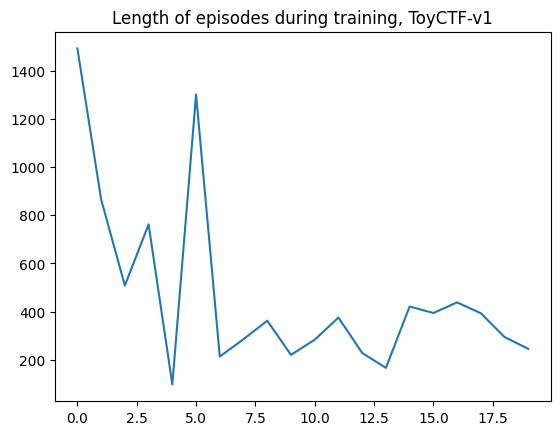

In [38]:
plt.plot([len(episodes)  for episodes in dql_run['all_episodes_availability']])
plt.title("Length of episodes during training 20 episode, ToyCTF-v1")
plt.show()

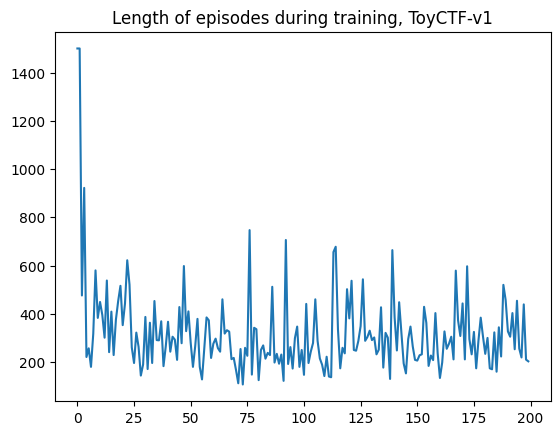

In [39]:
plt.plot([len(episodes)  for episodes in dql_run_200['all_episodes_availability']])
plt.title("Length of episodes during training, ToyCTF-v1")
plt.show()

In [ ]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

wrapped_env = AgentWrapper(gym_env,
                           ActionTrackingStateAugmentation(ep, gym_env.reset()))

learners = {'dql for 20 episodes': dql_run['learner'],'dql for 200 episodes': dql_run_2['learner']}
 #copy.deepcopy(dql_exploit_run['learner'])
obs = []
h = []
n=20 

render = False
for name, learner in learners.items():
    rewards = []
    for i_episode in range(n):
        observation = wrapped_env.reset()
        #learner.new_episode()
        obs.append(observation['action_mask']['local_vulnerability'])
        a = observation['action_mask']
        total_reward = 0

        for t in range(1000):
            action_style, gym_action, action_metadata  = learner.exploit(wrapped_env, observation) ## gym action
            if render and i_episode == n-1: print(gym_action)
            if not gym_action:
                _, gym_action, action_metadata = learner.explore(wrapped_env)

            observation, reward, done, info = wrapped_env.step(gym_action)

            #print(info)
            #learner.on_step(wrapped_env, observation, reward, done, info, action_metadata)
            #learner.end_of_iteration(t, done)

            total_reward += reward

            h.append((gym_env.get_explored_network_node_properties_bitmap_as_numpy(observation), gym_action))
            #print(h[-1])
            if gym_action is None:
                break

            if render and i_episode == n-1 and reward>0:
                print('####### rewarded action: {action}')
                print(f'total_reward={total_reward} reward={reward}')
                wrapped_env.render()

            if done:  ####### If AttackerGoal is not NONE or all 0
                print("Episode finished after {} timesteps".format(t+1))
                break
        rewards += [total_reward]

        if done: wrapped_env.render()

    wrapped_env.close()
    plt.plot(rewards, label=name)
print("simulation ended")

AttackerGoal(reward=0.0, low_availability=1.0, own_atleast=6, own_atleast_percent=0.0)
simulation ended


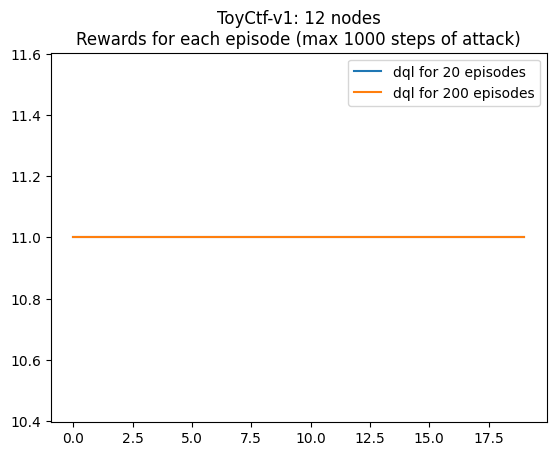

In [41]:
plt.title("ToyCtf-v1: 12 nodes\nRewards for each episode (max 1000 steps of attack)")
plt.legend()
plt.show()

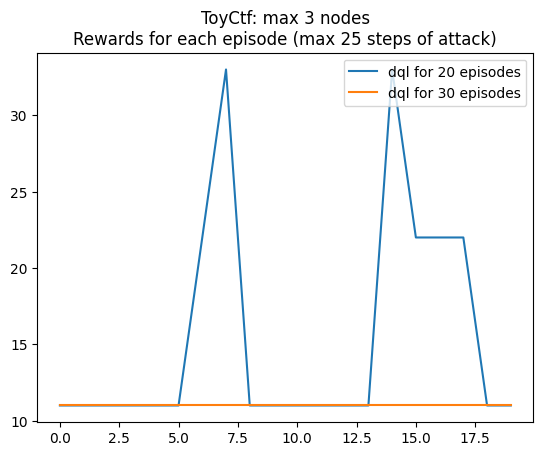

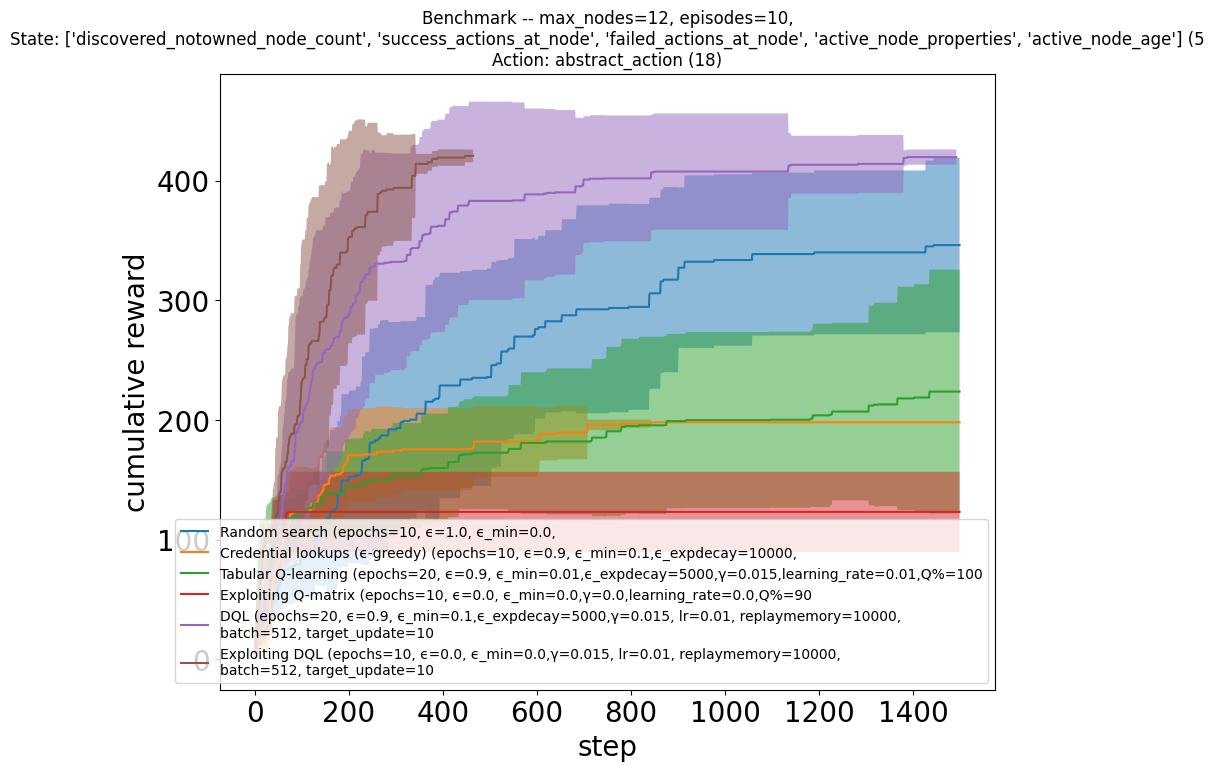

In [16]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

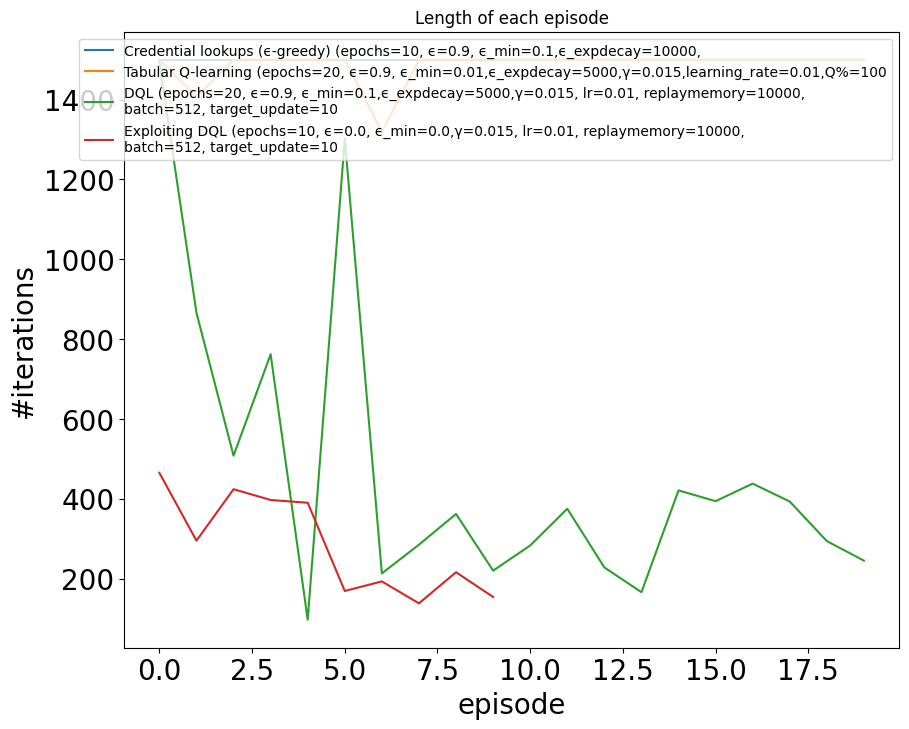

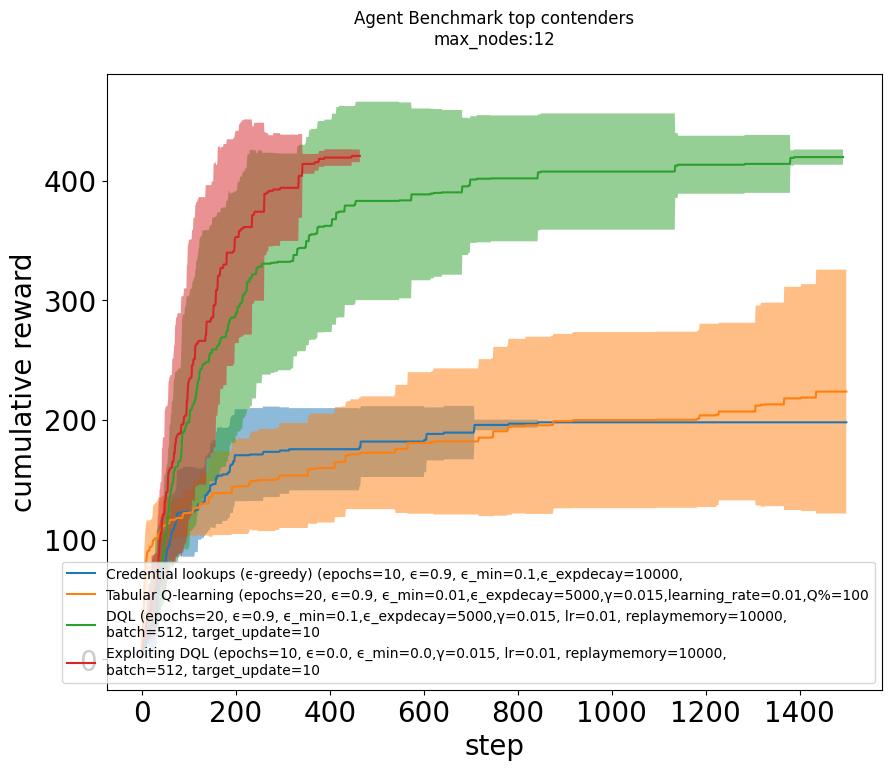

In [17]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

### Before PR

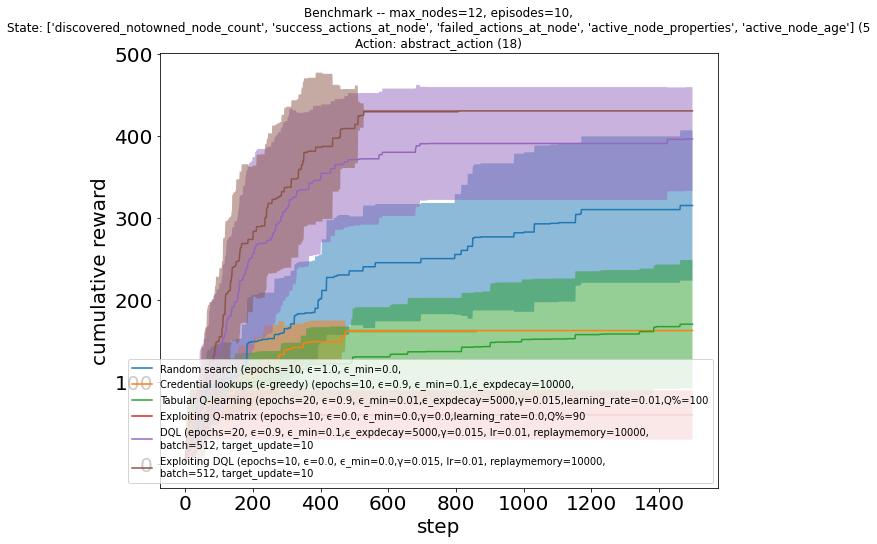

In [13]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

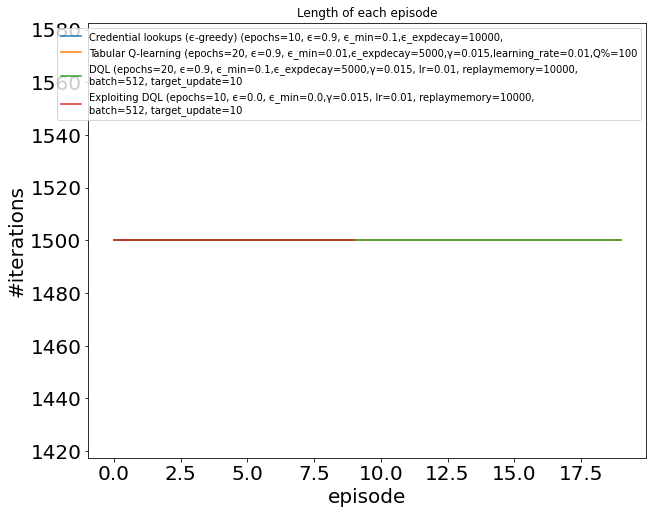

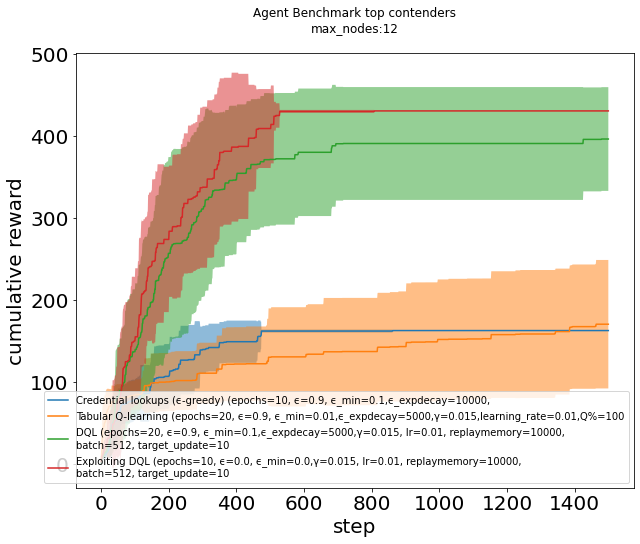

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

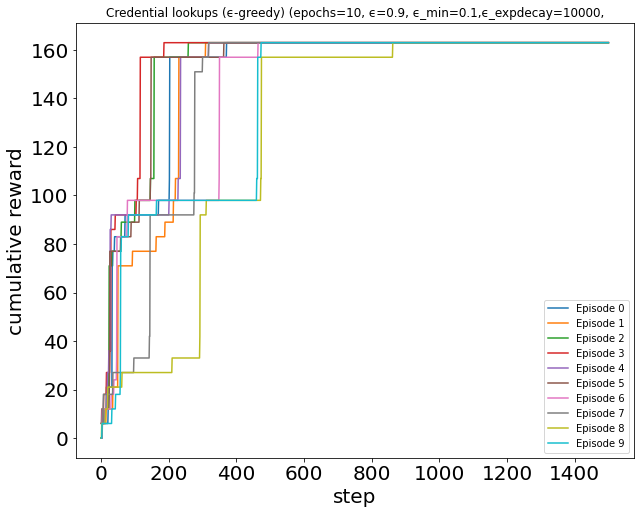

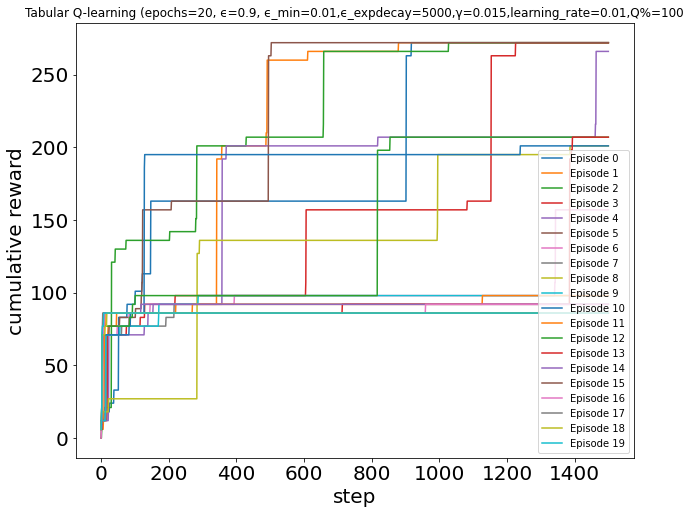

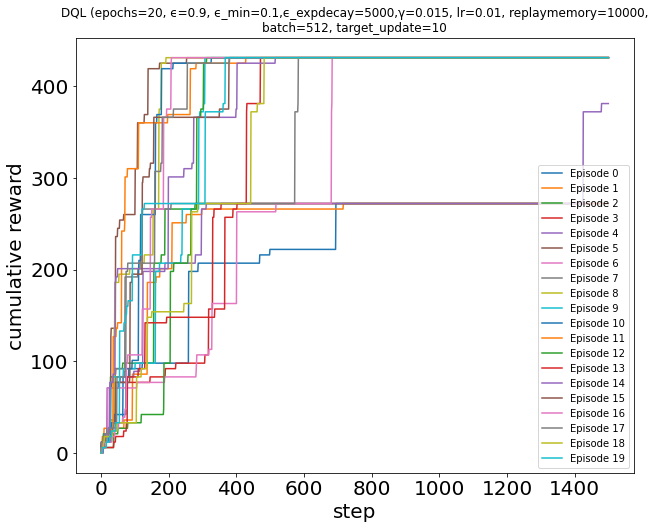

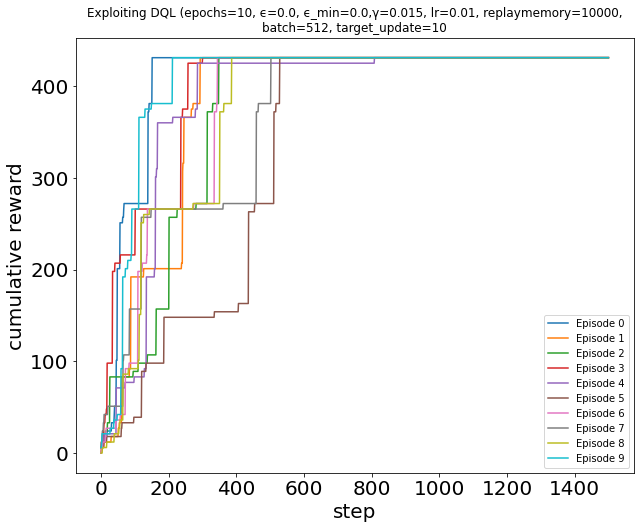

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)